# NMTLR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions

#from pycox.datasets import metabric
from pycox.models import MTLR
from pycox.evaluation import EvalSurv
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from pycox.models.utils import pad_col

In [2]:
 def analyze_file(data):
    print("Dataset:")
    display(data)
    
    # Output the shape of the dataset
    print("\nShape of the dataset (rows, columns):")
    print(data.shape)
    
    # Output the data types of each column
    print("\nData types of each column:")
    print(data.dtypes)
    
    # Output the count of missing values in each column
    print("\nCount of missing values in each column:")
    print(data.isnull().sum())

In [3]:
np.random.seed(1234)
_ = torch.manual_seed(123)

# Dataset

In [4]:
data = pd.read_csv('/Users/simrantanwar/Desktop/College/DDP/survival_analysis/data/tcga_brain_cleaned_26_10_2024.csv')
analyze_file(data)

Dataset:


,Unnamed: 0,Patient ID,age_at_initial_pathologic_diagnosis,initial_pathologic_dx_year,gender_MALE,race_WHITE,histological_type_Oligoastrocytoma,histological_type_Oligodendroglioma,histological_type_Untreated primary (de novo) GBM,treatment_outcome_first_course_Complete Remission/Response,treatment_outcome_first_course_Partial Remission/Response,treatment_outcome_first_course_Progressive Disease,OS,OS.time
0,0,TCGA-02-0047,28489.50,2005.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,448.0
1,1,TCGA-02-0055,22645.50,2005.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,76.0
2,2,TCGA-02-2483,15705.75,2008.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,466.0
3,3,TCGA-02-2485,19358.25,2009.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,470.0
4,4,TCGA-02-2486,23376.00,2008.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,661,TCGA-WY-A85A,7305.00,2010.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1320.0
662,662,TCGA-WY-A85B,8766.00,2010.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1393.0
663,663,TCGA-WY-A85C,13149.00,2010.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1426.0
664,664,TCGA-WY-A85D,21915.00,2010.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1147.0



Shape of the dataset (rows, columns):
(666, 14)

Data types of each column:
Unnamed: 0                                                      int64
Patient ID                                                     object
age_at_initial_pathologic_diagnosis                           float64
initial_pathologic_dx_year                                    float64
gender_MALE                                                   float64
race_WHITE                                                    float64
histological_type_Oligoastrocytoma                            float64
histological_type_Oligodendroglioma                           float64
histological_type_Untreated primary (de novo) GBM             float64
treatment_outcome_first_course_Complete Remission/Response    float64
treatment_outcome_first_course_Partial Remission/Response     float64
treatment_outcome_first_course_Progressive Disease            float64
OS                                                            float64
OS.time      

In [5]:
df = data.drop(columns=['Unnamed: 0','Patient ID'], axis=1)
analyze_file(df)

Dataset:


,age_at_initial_pathologic_diagnosis,initial_pathologic_dx_year,gender_MALE,race_WHITE,histological_type_Oligoastrocytoma,histological_type_Oligodendroglioma,histological_type_Untreated primary (de novo) GBM,treatment_outcome_first_course_Complete Remission/Response,treatment_outcome_first_course_Partial Remission/Response,treatment_outcome_first_course_Progressive Disease,OS,OS.time
0,28489.50,2005.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,448.0
1,22645.50,2005.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,76.0
2,15705.75,2008.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,466.0
3,19358.25,2009.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,470.0
4,23376.00,2008.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...
661,7305.00,2010.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1320.0
662,8766.00,2010.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1393.0
663,13149.00,2010.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1426.0
664,21915.00,2010.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1147.0



Shape of the dataset (rows, columns):
(666, 12)

Data types of each column:
age_at_initial_pathologic_diagnosis                           float64
initial_pathologic_dx_year                                    float64
gender_MALE                                                   float64
race_WHITE                                                    float64
histological_type_Oligoastrocytoma                            float64
histological_type_Oligodendroglioma                           float64
histological_type_Untreated primary (de novo) GBM             float64
treatment_outcome_first_course_Complete Remission/Response    float64
treatment_outcome_first_course_Partial Remission/Response     float64
treatment_outcome_first_course_Progressive Disease            float64
OS                                                            float64
OS.time                                                       float64
dtype: object

Count of missing values in each column:
age_at_initial_pathologic_di

# With treatment Outcome first course

In [6]:
#columns_to_drop = ['treatment_outcome_first_course_Complete Remission/Response','treatment_outcome_first_course_Partial Remission/Response','treatment_outcome_first_course_Progressive Disease']
#data_brain = data_brain.drop(columns_to_drop, axis=1)

In [7]:
# Create a test set by sampling 20% of the training data
df_test = df.sample(frac=0.2)

# Remove the test set from the original training data
df_train = df.drop(df_test.index)

# Create a validation set by sampling 20% of the remaining training data
df_val = df_train.sample(frac=0.2)

# Remove the validation set from the remaining training data
df_train = df_train.drop(df_val.index)


In [8]:
analyze_file(df_train)

Dataset:


,age_at_initial_pathologic_diagnosis,initial_pathologic_dx_year,gender_MALE,race_WHITE,histological_type_Oligoastrocytoma,histological_type_Oligodendroglioma,histological_type_Untreated primary (de novo) GBM,treatment_outcome_first_course_Complete Remission/Response,treatment_outcome_first_course_Partial Remission/Response,treatment_outcome_first_course_Progressive Disease,OS,OS.time
0,28489.50,2005.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,448.0
1,22645.50,2005.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,76.0
2,15705.75,2008.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,466.0
3,19358.25,2009.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,470.0
4,23376.00,2008.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...
658,23741.25,2013.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405.0
659,11688.00,2010.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1337.0
662,8766.00,2010.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1393.0
663,13149.00,2010.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1426.0



Shape of the dataset (rows, columns):
(426, 12)

Data types of each column:
age_at_initial_pathologic_diagnosis                           float64
initial_pathologic_dx_year                                    float64
gender_MALE                                                   float64
race_WHITE                                                    float64
histological_type_Oligoastrocytoma                            float64
histological_type_Oligodendroglioma                           float64
histological_type_Untreated primary (de novo) GBM             float64
treatment_outcome_first_course_Complete Remission/Response    float64
treatment_outcome_first_course_Partial Remission/Response     float64
treatment_outcome_first_course_Progressive Disease            float64
OS                                                            float64
OS.time                                                       float64
dtype: object

Count of missing values in each column:
age_at_initial_pathologic_di

# Featrue transform

In [9]:
cols_standardize =  ['age_at_initial_pathologic_diagnosis','initial_pathologic_dx_year','OS.time']
#cols_leave = ['type', 'gender','Outcome','tumor_status','OS']

standardize = [([col], StandardScaler()) for col in cols_standardize]
#leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize)

In [10]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

# Label Transforms
The survival methods require individual label transforms, so we have included a proposed label_transform for each method. In this case label_transform is just a shorthand for the class pycox.preprocessing.label_transforms.LabTransDiscreteTime.

The MTLR is a discrete-time method, meaning it requires discretization of the event times to be applied to continuous-time data. We let num_durations define the size of this (equidistant) discretization grid, meaning our network will have num_durations output nodes.

In [11]:
num_durations = 10
labtrans = MTLR.label_transform(num_durations)
get_target = lambda df: (df['OS.time'].values, df['OS'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

train = (x_train, y_train)
val = (x_val, y_val)

# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)

In [12]:
type(labtrans)

pycox.preprocessing.label_transforms.LabTransDiscreteTime

# Neural Net
We make a neural net with torch. For simple network structures, we can use the MLPVanilla provided by torchtuples.\
The following net is an MLP with two hidden layers (with 32 nodes each), ReLU activations, and num_nodes output nodes. We also have batch normalization and dropout between the layers.

In [13]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = labtrans.out_features
batch_norm = True
dropout = 0.1

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)

# Training

In [14]:
model = MTLR(net, tt.optim.Adam, duration_index=labtrans.cuts)

/Users/simrantanwar/opt/anaconda3/envs/venv/lib/python3.9/site-packages/torchtuples/base.py:669: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch

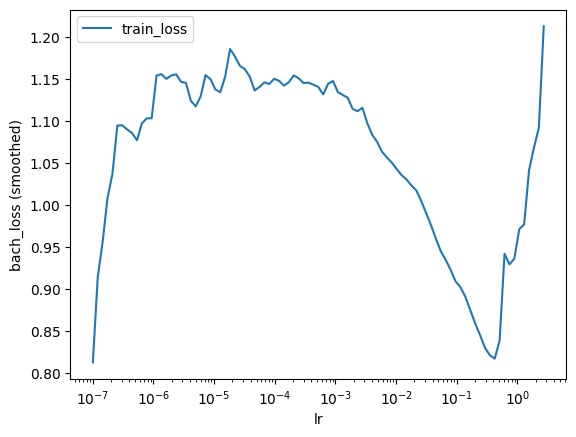

In [15]:
batch_size = 32
lr_finder = model.lr_finder(x_train, y_train, batch_size, tolerance=6)
_ = lr_finder.plot()

In [16]:
lr_finder.get_best_lr()

np.float64(0.0001)

In [17]:
model.optimizer.set_lr(0.0001)

In [18]:
epochs = 200
callbacks = [tt.callbacks.EarlyStopping()]
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, val_data=val)

0:	[0s / 0s],		train_loss: 1.1377,	val_loss: 1.0692
1:	[0s / 0s],		train_loss: 1.1157,	val_loss: 1.0619
2:	[0s / 0s],		train_loss: 1.0556,	val_loss: 1.0451
3:	[0s / 0s],		train_loss: 1.0397,	val_loss: 1.0122
4:	[0s / 0s],		train_loss: 1.0305,	val_loss: 0.9963
5:	[0s / 0s],		train_loss: 0.9946,	val_loss: 0.9832
6:	[0s / 0s],		train_loss: 0.9973,	val_loss: 0.9801
7:	[0s / 0s],		train_loss: 0.9708,	val_loss: 0.9515
8:	[0s / 0s],		train_loss: 0.9423,	val_loss: 0.9425
9:	[0s / 0s],		train_loss: 0.9464,	val_loss: 0.9338
10:	[0s / 0s],		train_loss: 0.9380,	val_loss: 0.9252
11:	[0s / 0s],		train_loss: 0.9563,	val_loss: 0.9024
12:	[0s / 0s],		train_loss: 0.8872,	val_loss: 0.8859
13:	[0s / 0s],		train_loss: 0.8784,	val_loss: 0.8723
14:	[0s / 0s],		train_loss: 0.8616,	val_loss: 0.8673
15:	[0s / 0s],		train_loss: 0.8543,	val_loss: 0.8523
16:	[0s / 0s],		train_loss: 0.8592,	val_loss: 0.8293
17:	[0s / 0s],		train_loss: 0.8360,	val_loss: 0.8330
18:	[0s / 0s],		train_loss: 0.8410,	val_loss: 0.8315
19:

/Users/simrantanwar/opt/anaconda3/envs/venv/lib/python3.9/site-packages/torchtuples/base.py:669: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch

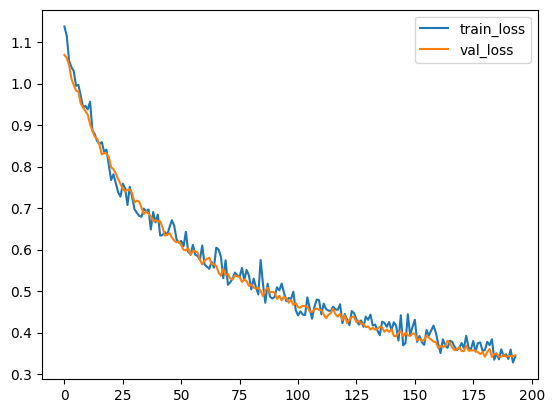

In [19]:
_ = log.plot()

# Prediction 

In [20]:
surv = model.predict_surv_df(x_test)

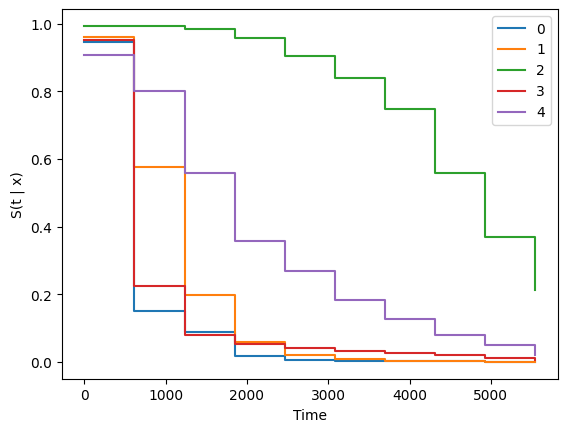

In [21]:
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [22]:
surv = model.interpolate(10).predict_surv_df(x_test)

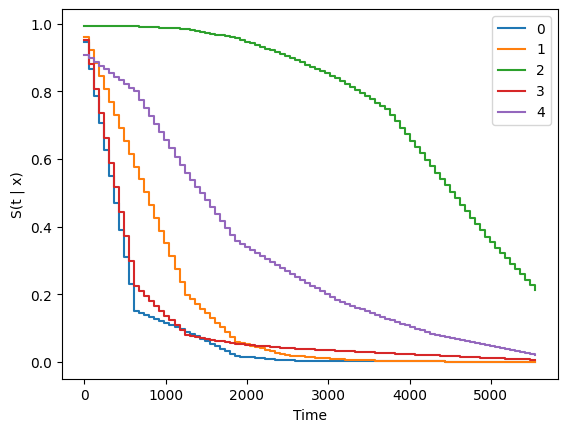

In [23]:
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

# Evaluation

In [24]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Concordance

In [25]:
ev.concordance_td('antolini')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


0.8260594560404807

# beier score

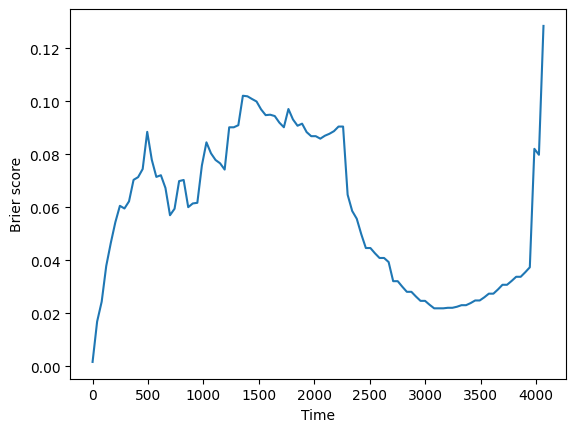

In [26]:
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev.brier_score(time_grid).plot()
plt.ylabel('Brier score')
_ = plt.xlabel('Time')

# Negatvie binominal log likelihood

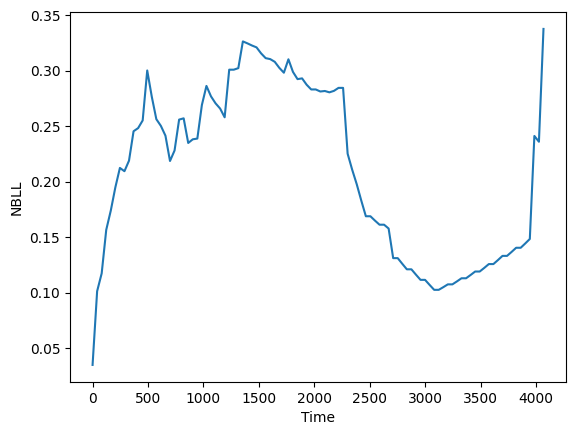

In [27]:
ev.nbll(time_grid).plot()
plt.ylabel('NBLL')
_ = plt.xlabel('Time')